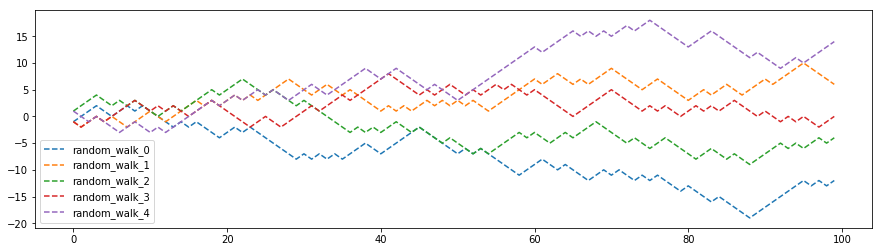

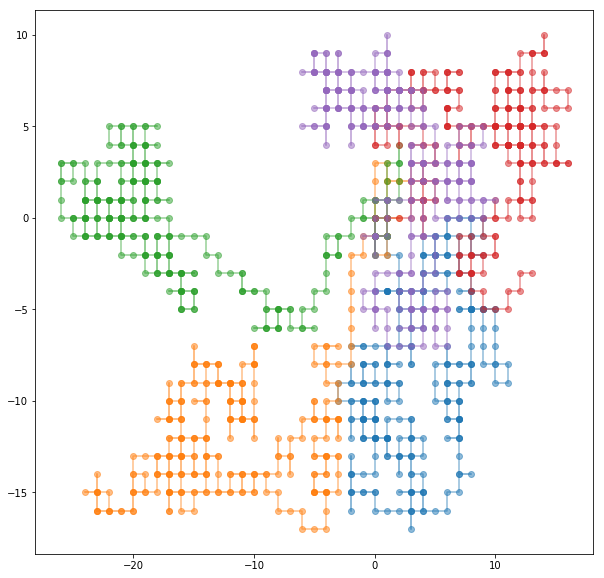

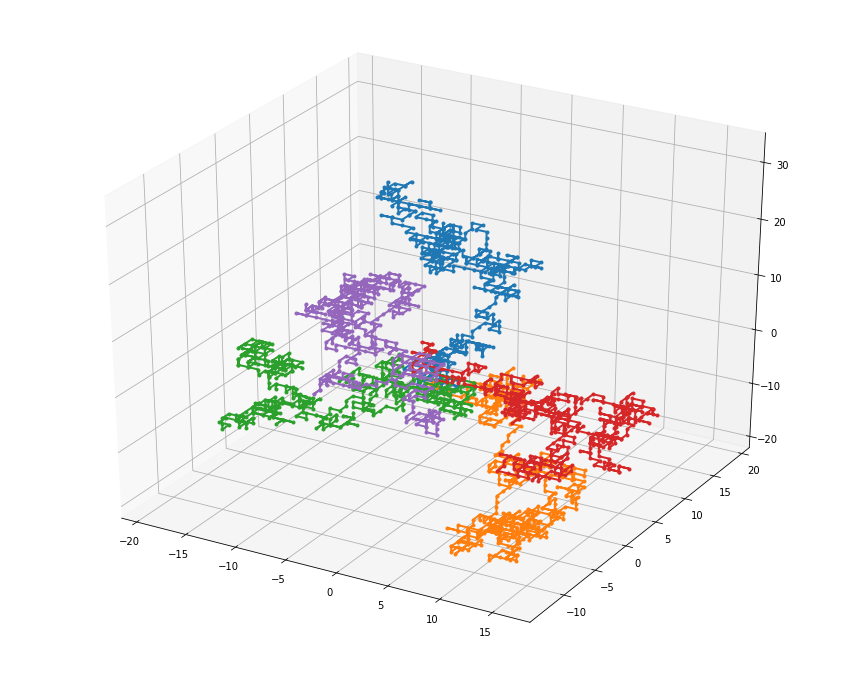

In [239]:
import numpy as np 
import matplotlib.pyplot as plt

## random walk in 1dim 
move_set = [-1, 1]
plt.figure(figsize=(15, 4))
for i in range(0, 5):
    xs = np.array([np.random.choice(move_set) for i in range(0, 100)])
    cum_xs = np.cumsum(xs)
    plt.plot(np.arange(0, len(xs)), cum_xs, linestyle='--', label='random_walk_{}'.format(i))
plt.legend()
plt.savefig('../../assets/images/markdown_img/180612_1143_random_walk_1d.svg')
plt.show()

## random walk in 2dim
move_set = [[-1, 0], [1, 0], [0, -1], [0, 1]]
plt.figure(figsize=(10, 10))
for i in range(0, 5):
    moves = [[0, 0]]+[move_set[np.random.randint(0, len(move_set))] for i in range(0, 300)]
    moves = np.array([np.array(m) for m in moves])
    cum_moves = np.cumsum(moves, axis=0)
    plt.plot(cum_moves[:, 0], cum_moves[:, 1], marker='o', alpha=0.5)
plt.savefig('../../assets/images/markdown_img/180612_1143_random_walk_2d.svg')
plt.show()

## random walk in 3dim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')
## random walk in 2dim
move_set = [[-1, 0, 0], [1, 0, 0], [0, 0, -1], [0, 0, 1], [0, 1, 0], [0, -1, 0]]

for i in range(0, 5):
    moves = [[0, 0, 0]]+[move_set[np.random.randint(0, len(move_set))] for i in range(0, 500)]
    moves = np.array([np.array(m) for m in moves])
    cum_moves = np.cumsum(moves, axis=0)
    ax.plot(cum_moves[:, 0], cum_moves[:, 1], cum_moves[:, 2], 
            marker='o', markersize=3, linestyle='-', linewidth=2)
plt.savefig('../../assets/images/markdown_img/180612_1143_random_walk_3d.svg')
plt.show()

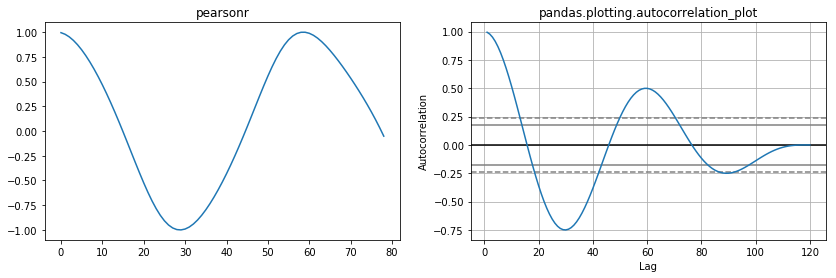

In [509]:
from scipy.stats import pearsonr
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import seaborn as sns 

#x = np.cumsum(np.random.normal(0, 1, 100))
x = np.sin(np.linspace(0, 3.14*4, 120)) # 60 step이 한 주기가 됨 

ac_lst = []
f, ax = plt.subplots(1, 2, figsize=(14, 4))
for lag in range(1, 80):
    ac_lst.append(pearsonr(x[0:len(x)-lag], x[lag:len(x)])[0])
ax[0].plot(np.arange(0, len(ac_lst)), ac_lst)
ax[0].set_title('pearsonr')
autocorrelation_plot(x, ax=ax[1])
ax[1].set_title('pandas.plotting.autocorrelation_plot')
plt.savefig('../../assets/images/markdown_img/180612_1322_autocorrelation_plot.svg')
plt.show()


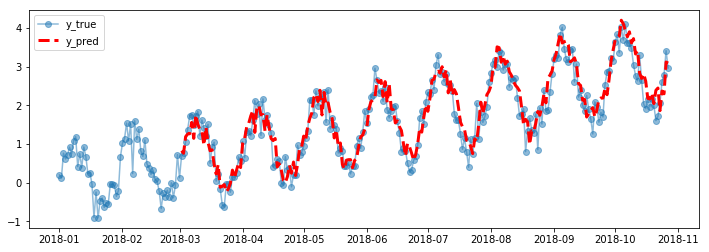

In [601]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

cycle = 10 # 몇 개의 cycle
point_per_cycle = 30 # cycle 별로 몇 개의 데이터? 
df = pd.DataFrame({'x':np.sin(np.linspace(0, 3.14*cycle*2, cycle*point_per_cycle))},
                  index = pd.date_range('2018-01-01', periods=cycle*point_per_cycle)
                 )
df['x'] = np.arange(0, len(df))/len(df)*3 + df['x'] + np.random.normal(0, 0.3, cycle*point_per_cycle)
df['d'] = np.arange(0, len(df))

## time shifting data generation 
for shift_v in [2, 5, 30, 60]:
    df['shift_{}'.format(shift_v)] = df['x'].shift(shift_v)
ind_columns = list(set(df.columns) - set(['x']))
df_dropna = df.dropna()
## data modeling and fitting
reg = LinearRegression()
reg.fit(df_dropna[ind_columns][:100], df_dropna['x'][:100])
## plotting
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['x'], marker='o', alpha=0.5, label='y_true')
plt.plot(df_dropna.index, reg.predict(df_dropna[ind_columns]), 
         linestyle='--', linewidth=3, label='y_pred', color='red')
plt.legend()
plt.savefig('../../assets/images/markdown_img/180612_1454_timeseries-plotting_reg.svg')
plt.show()

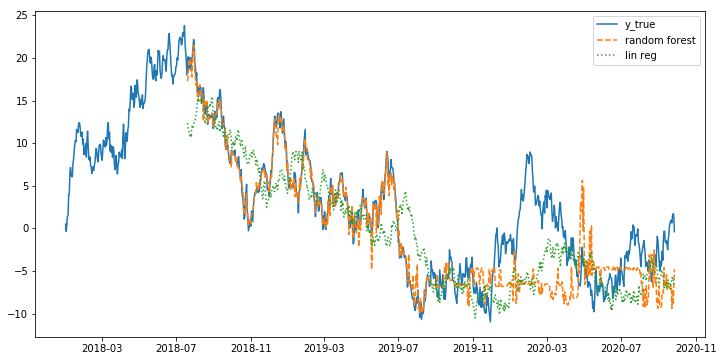

In [661]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

sample_size = 1000
df_rw = pd.DataFrame({'x': np.cumsum(np.random.normal(0, 1, sample_size))}, 
                     index =  pd.date_range('2018-01-01', periods=sample_size)
                 )
for shift_v in [30, 50, 100, 200]:
    df_rw['shift_{}'.format(shift_v)] = df_rw['x'].shift(shift_v)

ind_columns = list(set(df_rw.columns) - set(['x']))
df_rw_dropna = df_rw.dropna()
## data modeling and fitting
reg_lin = LinearRegression()
reg_rf = RandomForestRegressor()

reg_rf.fit(df_rw_dropna[ind_columns][:len(df_rw_dropna)//2], df_rw_dropna['x'][:len(df_rw_dropna)//2])
reg_lin.fit(df_rw_dropna[ind_columns][:len(df_rw_dropna)//2], df_rw_dropna['x'][:len(df_rw_dropna)//2])

plt.figure(figsize=(12, 6))
plt.plot(df_rw['x'], label='y_true')
plt.plot(df_rw_dropna.index, reg_rf.predict(df_rw_dropna[ind_columns]), label='random forest', linestyle='--')
plt.plot(df_rw_dropna.index, reg_lin.predict(df_rw_dropna[ind_columns]), label='lin reg', linestyle=':')
plt.legend()
plt.savefig("../../assets/images/markdown_img/180612_1511_random_walk_fitting.svg")
plt.show()